Perform classification using different algorithms. 
KNN, SVM, Random Forest, Tensorflow.
EDA is very important. Ensure justification for approach is used.
Training and validation datasets.

List of Tasks:-

- Import required libraries to use in Classification
- Identify PreProcessing steps
- Exploratory Data Analysis to identify features
- Identify Hypothesis and Null Hypothesis
- Convert categorical values using one hot encoding
- Perform PCA/SLA to reduce dimensionality
- KNN classification
- SVM Classification
- Random Forest Classification
- TensorFlow Classification
- Perceptron Classification (Using own built perceptron if possible)
- Neural Network Classification (increasing the layers from own built network)
- Keras Classification

To add, this dataset is a multi-label classification problem. The three classes, 'Normal', 'Aggressive', or 'Defensive', are to be predicted and attained from training data in the first instance.

Using supervised learning on the split training data, 

In [1]:
# importing required libraries

import os
import re
import math

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster, datasets, metrics
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preprocessing


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [3]:
f = open(r'C:\Users\charl\OneDrive\Msc Degree details\CE880\REsubmission_CE880_Aug_22\train_motion_data_normalized.csv')

In [4]:
dataframe = pd.read_csv(f)
dataframe.head(10)

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
5,0.158470,0.345891,0.355274,0.021533,0.115454,0.014584,NORMAL,3581632
6,0.078171,-0.349180,0.270652,0.034361,-0.030543,0.050625,NORMAL,3581632
7,-0.662750,-0.462775,-0.099797,0.008705,-0.009774,0.046960,NORMAL,3581633
8,0.467318,-0.234640,0.134139,-0.048717,-0.020769,-0.030009,NORMAL,3581633
9,-0.171895,-0.408894,0.414653,0.009316,0.058032,-0.019624,NORMAL,3581634


In [5]:
dataframe.shape

(3339, 8)

In [6]:
print(dataframe.columns.tolist())

['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Class', 'Timestamp']


In [7]:
train_data = dataframe.drop('Timestamp', axis=1)
train_data.describe()


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
count,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000
mean,0.033422,-0.074607,0.012268,0.001184,-0.001189,0.008887
std,0.979369,0.911050,0.993212,0.062582,0.115164,0.107804
min,-4.132884,-4.699795,-7.143998,-0.558178,-1.290758,-0.872392
25%,-0.550360,-0.592600,-0.554104,-0.028558,-0.053145,-0.027565
50%,-0.002812,-0.078801,0.000000,0.001985,-0.001222,0.003589
75%,0.571586,0.456261,0.556336,0.031307,0.050702,0.040852
max,4.985548,4.245151,5.171739,0.849255,1.255328,1.006019


In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AccX,3339.0,0.033422,0.979369,-4.132884,-0.550360,-0.002812,0.571586,4.985548
AccY,3339.0,-0.074607,0.911050,-4.699795,-0.592600,-0.078801,0.456261,4.245151
AccZ,3339.0,0.012268,0.993212,-7.143998,-0.554104,0.000000,0.556336,5.171739
GyroX,3339.0,0.001184,0.062582,-0.558178,-0.028558,0.001985,0.031307,0.849255
GyroY,3339.0,-0.001189,0.115164,-1.290758,-0.053145,-0.001222,0.050702,1.255328
GyroZ,3339.0,0.008887,0.107804,-0.872392,-0.027565,0.003589,0.040852,1.006019


In [9]:
train_data.dtypes

AccX     float64
AccY     float64
AccZ     float64
GyroX    float64
GyroY    float64
GyroZ    float64
Class     object
dtype: object

In [10]:
train_data.replace(np.nan, 0, inplace=True)

In [11]:
train_data.sum().isnull()

AccX     False
AccY     False
AccZ     False
GyroX    False
GyroY    False
GyroZ    False
Class    False
dtype: bool

In [12]:
print(train_data.shape)
print(train_data.columns)
train_data.head(-10)

(3339, 7)
Index(['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Class'], dtype='object')


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL
...,...,...,...,...,...,...,...
3324,0.932034,0.460150,-0.697646,-0.060934,-0.039095,-0.012294,SLOW
3325,1.654305,0.055435,-1.695218,-0.047495,0.076969,-0.025122,SLOW
3326,1.531926,0.417679,0.006208,-0.030391,0.244957,0.010919,SLOW
3327,0.170434,0.384533,0.657507,0.001374,0.047037,-0.066661,SLOW


In [13]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AccX    3339 non-null   float64
 1   AccY    3339 non-null   float64
 2   AccZ    3339 non-null   float64
 3   GyroX   3339 non-null   float64
 4   GyroY   3339 non-null   float64
 5   GyroZ   3339 non-null   float64
 6   Class   3339 non-null   object 
dtypes: float64(6), object(1)
memory usage: 182.7+ KB


In [14]:
train_data.isnull().sum()

AccX     0
AccY     0
AccZ     0
GyroX    0
GyroY    0
GyroZ    0
Class    0
dtype: int64

In [15]:
print(train_data.groupby('Class').size())

Class
AGGRESSIVE    1113
NORMAL        1113
SLOW          1113
dtype: int64


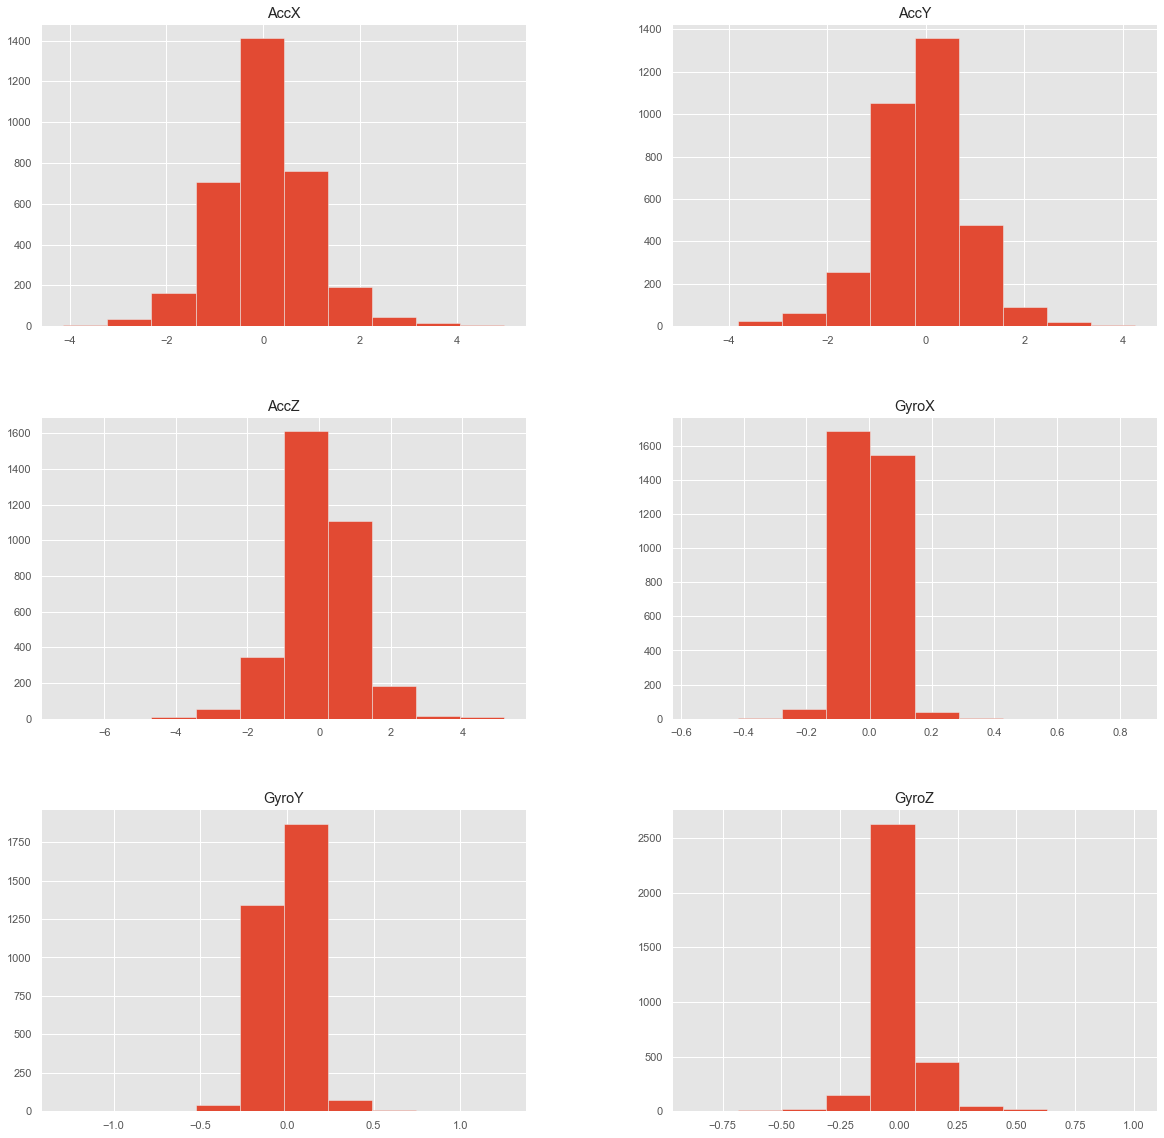

In [16]:
p_hist = train_data.hist(figsize = (20,20))

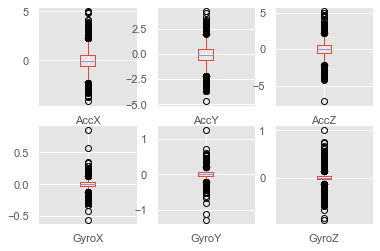

In [27]:
train_data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
pyplot.show()

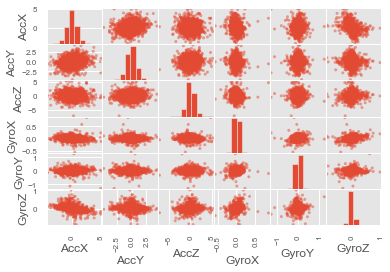

In [28]:
scatter_matrix(train_data)
pyplot.show()

Now need to perform clustering and dimensionality reduction. 

Also need to find outliers and remove any existing outliers.

In [35]:
# Declaring feature variables

""" As we know Class is catagorical in nature
we need to drop it, and then assign to our target variable """

X = train_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
print(X)
y = train_data[['Class']]
print(y)

X_copy = train_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]

y_copy = train_data[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size = 0.30, random_state = 42)


          AccX      AccY      AccZ     GyroX     GyroY     GyroZ
0     0.000000  0.000000  0.000000  0.059407 -0.174707  0.101938
1    -1.624864 -1.082492 -0.204183 -0.028558  0.051313  0.135536
2    -0.594660 -0.122410  0.220502 -0.019395 -0.029322  0.087888
3     0.738478 -0.228456  0.667732  0.069791 -0.029932  0.054902
4     0.101741  0.777568 -0.066730  0.030696 -0.003665  0.054902
...        ...       ...       ...       ...       ...       ...
3334  0.431670  0.539584  0.179422  0.014813 -0.080023  0.004811
3335 -1.265742  0.517372 -0.681800  0.037415 -0.029932 -0.019013
3336  0.788267  0.265228 -1.680777  0.024587 -0.001833  0.034132
3337  0.312490 -0.195053 -0.586542  0.082620  0.015882  0.020693
3338  0.534567 -0.214498  0.696875  0.026420  0.212581  0.128816

[3339 rows x 6 columns]
       Class
0     NORMAL
1     NORMAL
2     NORMAL
3     NORMAL
4     NORMAL
...      ...
3334    SLOW
3335    SLOW
3336    SLOW
3337    SLOW
3338    SLOW

[3339 rows x 1 columns]


In [36]:
from sklearn.preprocessing import OrdinalEncoder

ce = OrdinalEncoder()

train_data_enc = ce.fit(train_data)

train_data_enc.categories_

[array([-4.132884 , -3.7373357, -3.6858613, ...,  4.8323727,  4.933154 ,
         4.9855475]),
 array([-4.6997952, -3.7307277, -3.7300625, ...,  3.6508338,  4.058062 ,
         4.245151 ]),
 array([-7.143998 , -4.188234 , -4.0968165, ...,  4.906192 ,  4.95432  ,
         5.1717386]),
 array([-5.58178100e-01, -4.12792180e-01, -3.29103650e-01, -3.22384120e-01,
        -2.99782130e-01, -2.93062600e-01, -2.87564800e-01, -2.81456170e-01,
        -2.75958400e-01, -2.75347500e-01, -2.72293180e-01, -2.60686760e-01,
        -2.55799830e-01, -2.52134620e-01, -2.46636840e-01, -2.31976080e-01,
        -2.09374070e-01, -2.06930610e-01, -1.95935030e-01, -1.89826370e-01,
        -1.76387340e-01, -1.75776480e-01, -1.69667830e-01, -1.67835220e-01,
        -1.67224360e-01, -1.62337440e-01, -1.61726580e-01, -1.61115700e-01,
        -1.60504850e-01, -1.58061390e-01, -1.56228780e-01, -1.55007050e-01,
        -1.53174460e-01, -1.52563600e-01, -1.50120140e-01, -1.48287530e-01,
        -1.47676680e-01, -1.470

In [37]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('svc', SVC())])

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.4231536926147705

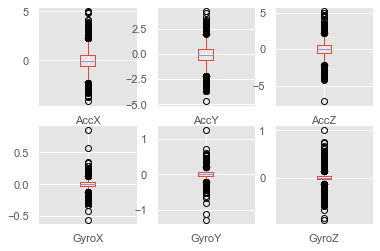

In [34]:
train_data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
pyplot.show()

In [158]:
# Declaring feature variables

""" As we know Class is catagorical in nature
we need to drop it, and then assign to our target variable """

X = train_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
print(X)
y = train_data[['Class']]
print(y)

          AccX      AccY      AccZ     GyroX     GyroY     GyroZ
0     0.000000  0.000000  0.000000  0.059407 -0.174707  0.101938
1    -1.624864 -1.082492 -0.204183 -0.028558  0.051313  0.135536
2    -0.594660 -0.122410  0.220502 -0.019395 -0.029322  0.087888
3     0.738478 -0.228456  0.667732  0.069791 -0.029932  0.054902
4     0.101741  0.777568 -0.066730  0.030696 -0.003665  0.054902
...        ...       ...       ...       ...       ...       ...
3334  0.431670  0.539584  0.179422  0.014813 -0.080023  0.004811
3335 -1.265742  0.517372 -0.681800  0.037415 -0.029932 -0.019013
3336  0.788267  0.265228 -1.680777  0.024587 -0.001833  0.034132
3337  0.312490 -0.195053 -0.586542  0.082620  0.015882  0.020693
3338  0.534567 -0.214498  0.696875  0.026420  0.212581  0.128816

[3339 rows x 6 columns]
       Class
0     NORMAL
1     NORMAL
2     NORMAL
3     NORMAL
4     NORMAL
...      ...
3334    SLOW
3335    SLOW
3336    SLOW
3337    SLOW
3338    SLOW

[3339 rows x 1 columns]


In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

print(y_train.head)
y_train.shape

<bound method NDFrame.head of            Class
3237        SLOW
358       NORMAL
100       NORMAL
2940        SLOW
551       NORMAL
...          ...
1095      NORMAL
1130  AGGRESSIVE
1294  AGGRESSIVE
860       NORMAL
3174        SLOW

[2337 rows x 1 columns]>


(2337, 1)

In [190]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
KNN_classifier = KNeighborsClassifier(n_neighbors=200)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [39]:
y_predict_KNN = KNN_classifier.predict(X_test)

In [40]:
print(confusion_matrix(y_test, y_predict_KNN))
print(classification_report(y_test, y_predict_KNN))

[[ 99  46 165]
 [ 46  95 225]
 [ 33  73 220]]
              precision    recall  f1-score   support

  AGGRESSIVE       0.56      0.32      0.41       310
      NORMAL       0.44      0.26      0.33       366
        SLOW       0.36      0.67      0.47       326

    accuracy                           0.41      1002
   macro avg       0.45      0.42      0.40      1002
weighted avg       0.45      0.41      0.40      1002



In [198]:

from sklearn.preprocessing import LabelEncoder

cols = ['Class']

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(train_data[c].values))
    train_data[c] = lbl.transform(list(train_data[c].values))

print('Shape train_data: {} '.format(train_data.shape))

train_data['Class']

Shape train_data: (3339, 7) 


0       1
1       1
2       1
3       1
4       1
       ..
3334    2
3335    2
3336    2
3337    2
3338    2
Name: Class, Length: 3339, dtype: int64

In [200]:
X = train_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
print(X)
y = train_data[['Class']]
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


          AccX      AccY      AccZ     GyroX     GyroY     GyroZ
0     0.000000  0.000000  0.000000  0.059407 -0.174707  0.101938
1    -1.624864 -1.082492 -0.204183 -0.028558  0.051313  0.135536
2    -0.594660 -0.122410  0.220502 -0.019395 -0.029322  0.087888
3     0.738478 -0.228456  0.667732  0.069791 -0.029932  0.054902
4     0.101741  0.777568 -0.066730  0.030696 -0.003665  0.054902
...        ...       ...       ...       ...       ...       ...
3334  0.431670  0.539584  0.179422  0.014813 -0.080023  0.004811
3335 -1.265742  0.517372 -0.681800  0.037415 -0.029932 -0.019013
3336  0.788267  0.265228 -1.680777  0.024587 -0.001833  0.034132
3337  0.312490 -0.195053 -0.586542  0.082620  0.015882  0.020693
3338  0.534567 -0.214498  0.696875  0.026420  0.212581  0.128816

[3339 rows x 6 columns]
      Class
0         1
1         1
2         1
3         1
4         1
...     ...
3334      2
3335      2
3336      2
3337      2
3338      2

[3339 rows x 1 columns]


Now I have assigned each 'Y' variable under a hot encoding method, we can begin by feeding this into our Isolation Forest to find any outliers

In [65]:
col_names = ['Class']
for col in col_names: print(train_data[col].value_counts())

print(list(col_names))

NORMAL        1113
AGGRESSIVE    1113
SLOW          1113
Name: Class, dtype: int64
['Class']


In [187]:
print(X.head())
print(y.head())
print(train_data.shape[:10])

       AccX      AccY      AccZ     GyroX     GyroY     GyroZ
0  0.000000  0.000000  0.000000  0.059407 -0.174707  0.101938
1 -1.624864 -1.082492 -0.204183 -0.028558  0.051313  0.135536
2 -0.594660 -0.122410  0.220502 -0.019395 -0.029322  0.087888
3  0.738478 -0.228456  0.667732  0.069791 -0.029932  0.054902
4  0.101741  0.777568 -0.066730  0.030696 -0.003665  0.054902
    Class
0  NORMAL
1  NORMAL
2  NORMAL
3  NORMAL
4  NORMAL
(3339, 7)


In [44]:

# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
print(cross_val_score(X))
# view the feature scores
#feature_scores = pd.Series(clf.feature_importances_, index= X_train).sort_values(ascending=False)

TypeError: cross_val_score() missing 1 required positional argument: 'X'

In [ ]:
from sklearn.ensemble import IsolationForest


iso_100 = IsolationForest(n_estimators=100, verbose=0)

iso_100.fit(X_train)



In [92]:
print(y_train.shape)
print(y_test.shape)


(2337,)
(1002,)


In [45]:
rfc = RandomForestClassifier(n_estimators = 150, random_state=42)
rfc.fit(X_train, y_train)

# predict test results

y_pred = rfc.predict(X_test)

# check accuracy

print('Model Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model Accuracy: 0.4122


In [46]:
#rfc_100 = RandomForestClassifier(n_estimators=1000, bootstrap=True,
#                                 random_state=42, warm_start = True)
rfc_1000 = RandomForestClassifier(n_estimators=1000, random_state=42)
                                  
rfc_1000.fit(X_train, y_train)
y_pred_1000 = rfc_1000.predict(X_test)
print('Model Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model Accuracy: 0.4122


In [47]:
# finding feature importance with RFC

feature_scores_initial = pd.Series(rfc_1000.feature_importances_,
                                   index=X_train.columns).sort_values(ascending=False)
feature_scores_initial

AccY     0.187444
AccX     0.176933
AccZ     0.169045
GyroZ    0.158929
GyroY    0.154880
GyroX    0.152769
dtype: float64

In [52]:
""" Initializing one hot encoding on our feature variables to better pair with our random forest classifier """
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, categories = [])

onehot = encoder.fit_transform(y)
print(onehot)

onehot.dtype

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).